In [1]:
from pycaret.datasets import get_data
from pycaret.classification import setup

In [2]:
df = get_data("housing")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
model_setup = setup(df, target="ocean_proximity", session_id=111)

,Description,Value
0,Session id,111
1,Target,ocean_proximity
2,Target type,Multiclass
3,Target mapping,"<1H OCEAN: 0, INLAND: 1, ISLAND: 2, NEAR BAY: 3, NEAR OCEAN: 4"
4,Original data shape,"(20640, 10)"
5,Transformed data shape,"(20640, 10)"
6,Transformed train set shape,"(14447, 10)"
7,Transformed test set shape,"(6193, 10)"
8,Numeric features,9
9,Rows with missing values,1.0%


In [4]:
best_model = model_setup.compare_models(turbo=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9711,0.3918,0.9711,0.9711,0.9711,0.9571,0.9571,0.0870
rf,Random Forest Classifier,0.9695,0.3991,0.9695,0.9693,0.9692,0.9547,0.9548,0.4200
gbc,Gradient Boosting Classifier,0.9691,0.3989,0.9691,0.9690,0.9690,0.9541,0.9541,4.3740
et,Extra Trees Classifier,0.9534,0.3985,0.9534,0.9536,0.9529,0.9305,0.9309,0.3100
lightgbm,Light Gradient Boosting Machine,0.9417,0.3875,0.9417,0.9440,0.9428,0.9138,0.9139,4.3860
qda,Quadratic Discriminant Analysis,0.8057,0.3689,0.8057,0.7912,0.7888,0.7072,0.7119,0.0110
lda,Linear Discriminant Analysis,0.7668,0.3670,0.7668,0.7598,0.7395,0.6424,0.6553,0.0490
ridge,Ridge Classifier,0.7665,0.0000,0.7665,0.6859,0.7150,0.6277,0.6539,0.0130
ada,Ada Boost Classifier,0.7354,0.3103,0.7354,0.7392,0.7331,0.6114,0.6133,0.1250
nb,Naive Bayes,0.6557,0.3265,0.6557,0.5852,0.6136,0.4720,0.4820,0.0430


In [12]:
type(best_model)

sklearn.tree._classes.DecisionTreeClassifier

In [26]:
dt_model = model_setup.create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9730,0.0000,0.9730,0.9730,0.9729,0.9599,0.9599
1,0.9702,0.0000,0.9702,0.9703,0.9703,0.9559,0.9559
2,0.9723,0.0000,0.9723,0.9724,0.9723,0.9589,0.9590
3,0.9702,0.9782,0.9702,0.9701,0.9701,0.9559,0.9559
4,0.9723,0.9779,0.9723,0.9724,0.9723,0.9588,0.9589
5,0.9779,0.9834,0.9779,0.9779,0.9778,0.9672,0.9672
6,0.9716,0.9789,0.9716,0.9716,0.9716,0.9580,0.9580
7,0.9695,0.0000,0.9695,0.9698,0.9696,0.9548,0.9548
8,0.9633,0.0000,0.9633,0.9636,0.9633,0.9458,0.9459


In [6]:
model_setup.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

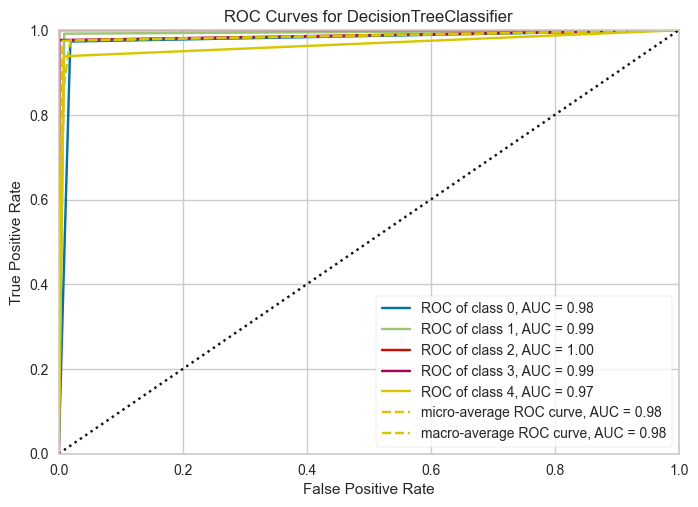

In [9]:
model_setup.plot_model(best_model, plot="auc")

In [10]:
output_df = model_setup.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9925,0.9944,0.9925,0.9925,0.9925,0.9889,0.9889


In [11]:
output_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,prediction_label,prediction_score
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,NEAR BAY,1.0
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,NEAR BAY,1.0
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,NEAR BAY,1.0
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,NEAR BAY,1.0
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,NEAR BAY,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.089996,39.480000,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,INLAND,1.0
20636,-121.209999,39.490002,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,INLAND,1.0
20637,-121.220001,39.430000,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,INLAND,1.0
20638,-121.320000,39.430000,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,INLAND,1.0


In [13]:
output_df.loc[:, ["ocean_proximity", "prediction_label"]]

,ocean_proximity,prediction_label
0,NEAR BAY,NEAR BAY
1,NEAR BAY,NEAR BAY
2,NEAR BAY,NEAR BAY
3,NEAR BAY,NEAR BAY
4,NEAR BAY,NEAR BAY
...,...,...
20635,INLAND,INLAND
20636,INLAND,INLAND
20637,INLAND,INLAND
20638,INLAND,INLAND


In [27]:
saved_model, model_path = model_setup.save_model(best_model, "../../data/06_models/dt-model")

Transformation Pipeline and Model Successfully Saved


In [15]:
saved_model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['longitude', 'latitude',
                                             'housing_median_age',
                                             'total_rooms', 'total_bedrooms',
                                             'population', 'households',
                                             'median_income',
                                             'median_house_value'],
                                    t...
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=111, splitter='best'))],
         verbose=False)

In [16]:
type(best_model)

sklearn.tree._classes.DecisionTreeClassifier

In [17]:
output_df = model_setup.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9925,0.9944,0.9925,0.9925,0.9925,0.9889,0.9889


In [18]:
model_setup.pipeline.transform(df.drop(columns="ocean_proximity"))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [20]:
best_model.predict(model_setup.pipeline.transform(df.drop(columns="ocean_proximity")))

array([3, 3, 3, ..., 1, 1, 1])

In [21]:
model_setup.pipeline

Pipeline(memory=FastMemory(location=C:\Users\DAWIDK~1\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['longitude', 'latitude',
                                             'housing_median_age',
                                             'total_rooms', 'total_bedrooms',
                                             'population', 'househol...
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated')))],
         verbose=False)

In [22]:
best_model = model_setup.load_model("dt-model")

Transformation Pipeline and Model Successfully Loaded


In [25]:
model_setup.predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9751,0.9814,0.9751,0.9751,0.9751,0.9631,0.9631


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,prediction_label,prediction_score
7011,-118.070000,33.970001,32.0,3400.0,826.0,3017.0,793.0,2.4607,155600.0,<1H OCEAN,<1H OCEAN,1.0
8272,-118.160004,33.770000,38.0,3235.0,769.0,1284.0,752.0,2.9384,304100.0,NEAR OCEAN,NEAR OCEAN,1.0
6508,-118.070000,34.070000,19.0,1554.0,393.0,1427.0,370.0,3.1250,207100.0,<1H OCEAN,<1H OCEAN,1.0
11073,-117.839996,33.840000,23.0,4388.0,864.0,2526.0,846.0,4.5217,219400.0,<1H OCEAN,<1H OCEAN,1.0
332,-122.169998,37.740002,47.0,463.0,134.0,327.0,137.0,2.1500,97200.0,NEAR BAY,NEAR BAY,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1816,-122.309998,37.930000,39.0,2505.0,371.0,872.0,345.0,5.3433,286500.0,NEAR BAY,NEAR BAY,1.0
5546,-118.400002,33.970001,44.0,2825.0,453.0,1221.0,461.0,5.9544,377200.0,<1H OCEAN,<1H OCEAN,1.0
1864,-123.830002,41.880001,18.0,1504.0,357.0,660.0,258.0,3.1300,116700.0,<1H OCEAN,<1H OCEAN,1.0
7404,-118.209999,33.959999,39.0,2050.0,529.0,1959.0,485.0,2.1389,168900.0,<1H OCEAN,<1H OCEAN,1.0
